In [71]:
import numpy as np

In [72]:
import pandas as pd

In [73]:
data_test = pd.read_csv("application_test.csv")

In [74]:
data_train = pd.read_csv("application_train.csv")

In [76]:
print("Amount of columns and rows in data_test",data_test.shape)
print("Amount of columns and rows in data_train",data_train.shape)

Amount of columns and rows in data_test (48744, 121)
Amount of columns and rows in data_train (307511, 122)


In [77]:
pd.set_option("display.max_rows",150)
pd.set_option("display.max_columns", 150)

In [78]:
data_train.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [79]:
data_train.sample(25)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
171229,298441,0,Cash loans,M,N,Y,0,157500.0,450000.0,21109.5,450000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0.026392,-19329,-314,-3761.0,-1052,NaN,1,1,0,1,1,0,Drivers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.703431,0.546023,0.0825,NaN,0.9771,NaN,NaN,0.00,0.1379,0.1667,NaN,NaN,NaN,0.0481,NaN,0.0878,0.0840,NaN,0.9772,NaN,NaN,0.0000,0.1379,0.1667,NaN,NaN,NaN,0.0501,NaN,0.0930,0.0833,NaN,0.9771,NaN,NaN,0.00,0.1379,0.1667,NaN,NaN,NaN,0.0490,NaN,0.0897,NaN,block of flats,0.0569,Panel,No,0.0,0.0,0.0,0.0,-1149.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2.0,0.0,2.0
99524,215544,1,Cash loans,F,N,Y,0,112500.0,562491.0,27189.0,454500.0,Family,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,0.006629,-20805,365243,-504.0,-143,NaN,1,0,0,1,0,0,NaN,2.0,2,2,THURSDAY,10,0,0,0,0,0,0,XNA,NaN,0.142788,NaN,0.0124,0.0000,0.9821,0.7552,0.0237,0.00,0.1034,0.0417,0.0417,0.0654,0.0101,0.0146,0.0000,0.0069,0.0126,0.0000,0.9821,0.7648,0.0240,0.0000,0.1034,0.0417,0.0417,0.0669,0.0110,0.0152,0.0000,0.0074,0.0125,0.0000,0.9821,0.7585,0.0239,0.00,0.1034,0.0417,0.0417,0.0665,0.0103,0.0148,0.0000,0.0071,not specified,block of flats,0.0130,Wooden,No,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
159854,285303,0,Cash loans,M,Y,N,0,270000.0,226152.0,10876.5,162000.0,Unaccompanied,Commercial associate,Higher education,Separated,House / apartment,0.072508,-20174,-4130,-2680.0,-2701,10.0,1,1,0,1,0,0,High skill tech staff,1.0,1,1,MONDAY,16,0,0,0,0,0,0,Construction,NaN,0.721181,NaN,0.0619,0.0577,0.9737,0.6396,0.0000,0.00,0.1034,0.1667,0.2083,0.0000,0.0504,0.0519,0.0000,0.0000,0.0630,0.0599,0.9737,0.6537,0.0000,0.0000,0.1034,0.1667,0.2083,0.0000,0.0551,0.0541,0.0000,0.00

In [80]:
data_train.select_dtypes(include=[object]).apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [81]:
categorical_features = ["NAME_CONTRACT_TYPE", "CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", "NAME_TYPE_SUITE", "NAME_INCOME_TYPE",
                       "NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS","NAME_HOUSING_TYPE","OCCUPATION_TYPE","WEEKDAY_APPR_PROCESS_START",
                        "ORGANIZATION_TYPE", "FONDKAPREMONT_MODE","HOUSETYPE_MODE","WALLSMATERIAL_MODE","EMERGENCYSTATE_MODE"]
for feature in categorical_features:
    data_train[feature] = data_train[feature].astype("category")

In [82]:
data_train.dtypes

SK_ID_CURR                         int64
TARGET                             int64
NAME_CONTRACT_TYPE              category
CODE_GENDER                     category
FLAG_OWN_CAR                    category
FLAG_OWN_REALTY                 category
CNT_CHILDREN                       int64
AMT_INCOME_TOTAL                 float64
AMT_CREDIT                       float64
AMT_ANNUITY                      float64
AMT_GOODS_PRICE                  float64
NAME_TYPE_SUITE                 category
NAME_INCOME_TYPE                category
NAME_EDUCATION_TYPE             category
NAME_FAMILY_STATUS              category
NAME_HOUSING_TYPE               category
REGION_POPULATION_RELATIVE       float64
DAYS_BIRTH                         int64
DAYS_EMPLOYED                      int64
DAYS_REGISTRATION                float64
DAYS_ID_PUBLISH                    int64
OWN_CAR_AGE                      float64
FLAG_MOBIL                         int64
FLAG_EMP_PHONE                     int64
FLAG_WORK_PHONE 

In [83]:
numerical_features = ["CNT_CHILDREN","AMT_INCOME_TOTAL","AMT_CREDIT", "EXT_SOURCE_3","EXT_SOURCE_2","DAYS_EMPLOYED",
                      "DAYS_BIRTH","AMT_GOODS_PRICE"]

In [84]:
data_train.isnull().sum().sum() 

9152465

In [85]:
data_train.isnull().any(axis=0).sum()


67

In [86]:
import matplotlib.pyplot as plt

In [87]:
def nan_df_create(data):    
    nan_percentages = data_train.isna().sum() * 100 / len(data_train)
    df = pd.DataFrame({'column' : nan_percentages.index, 'percent' : nan_percentages.values})
    df.sort_values(by = 'percent', ascending = False, inplace = True)
    return df

In [88]:
import seaborn as sns

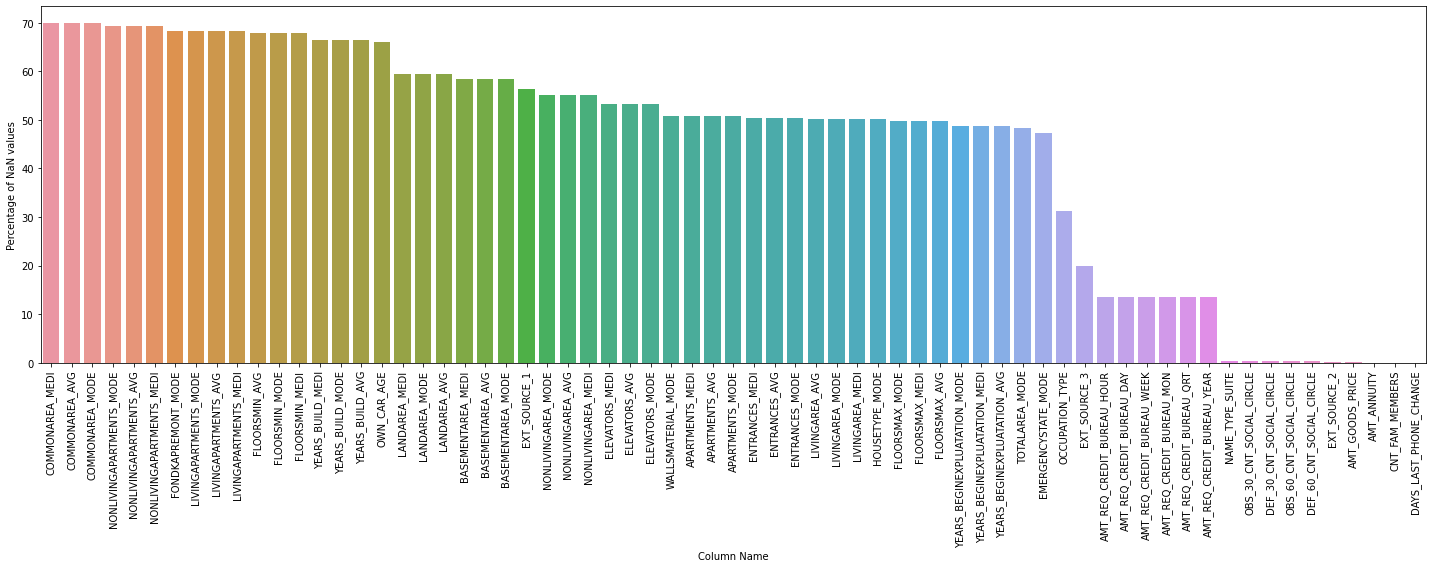

In [89]:
plt.figure(figsize = (20,8), tight_layout = True)
sns.barplot(x= 'column', y = 'percent', data = nan_df_create(data_train)[nan_df_create(data_train)['percent'] > 0])
plt.xticks(rotation = 90)
plt.xlabel('Column Name')
plt.ylabel('Percentage of NaN values')
plt.show()

In [90]:
data_train.isna().sum().sort_values()

SK_ID_CURR                           0
HOUR_APPR_PROCESS_START              0
REG_REGION_NOT_WORK_REGION           0
LIVE_REGION_NOT_WORK_REGION          0
REG_CITY_NOT_LIVE_CITY               0
REG_CITY_NOT_WORK_CITY               0
LIVE_CITY_NOT_WORK_CITY              0
ORGANIZATION_TYPE                    0
FLAG_DOCUMENT_21                     0
FLAG_DOCUMENT_20                     0
FLAG_DOCUMENT_19                     0
FLAG_DOCUMENT_18                     0
FLAG_DOCUMENT_17                     0
FLAG_DOCUMENT_16                     0
FLAG_DOCUMENT_15                     0
FLAG_DOCUMENT_14                     0
FLAG_DOCUMENT_13                     0
FLAG_DOCUMENT_12                     0
FLAG_DOCUMENT_11                     0
FLAG_DOCUMENT_10                     0
FLAG_DOCUMENT_9                      0
FLAG_DOCUMENT_8                      0
FLAG_DOCUMENT_7                      0
FLAG_DOCUMENT_6                      0
FLAG_DOCUMENT_5                      0
FLAG_DOCUMENT_4          

In [91]:
data_train[['EXT_SOURCE_3','EXT_SOURCE_2','AMT_GOODS_PRICE','CNT_FAM_MEMBERS']] = data_train[['EXT_SOURCE_3','EXT_SOURCE_2','AMT_GOODS_PRICE','CNT_FAM_MEMBERS']].fillna(value=data_train[['EXT_SOURCE_3',
'EXT_SOURCE_2','AMT_GOODS_PRICE','CNT_FAM_MEMBERS']].mean())
data_train[['EXT_SOURCE_3','EXT_SOURCE_2']] = data_train[['EXT_SOURCE_3','EXT_SOURCE_2']].fillna(value=data_train[['EXT_SOURCE_3',
                                                                                                                          'EXT_SOURCE_2']].mean())

In [92]:
data_train[data_train.duplicated()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


In [93]:
data_train.describe(include="all")

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511,307511,307511,307511,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.075110e+05,306219,307511,307511,307511,307511,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,211120,307511.000000,307511.000000,307511.000000,307511,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511,134133.000000,3.075110e+05,307511.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,97216,153214,159080.000000,151170,161756,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
unique,NaN,NaN,2,3,2,2,NaN,NaN,NaN,NaN,NaN,7,8,5,6,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

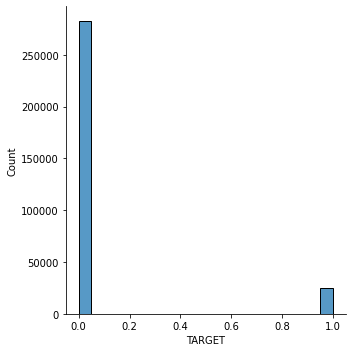

In [94]:
sns.displot(data_train["TARGET"], kde=False)

In [95]:
import plotly.graph_objects as go

In [96]:
target_distribution = data_train.TARGET.value_counts()
print( data_train.TARGET.value_counts())
labels = ['Non-Defaulter', 'Defaulter']

fig = go.Figure(data = [
        go.Pie(values = target_distribution, labels = labels, textinfo = 'label+percent+value' , pull = [0,0.04])], 
         )

fig.show()

0    282686
1     24825
Name: TARGET, dtype: int64


array([[<AxesSubplot:title={'center':'SK_ID_CURR'}>,
        <AxesSubplot:title={'center':'TARGET'}>,
        <AxesSubplot:title={'center':'CNT_CHILDREN'}>,
        <AxesSubplot:title={'center':'AMT_INCOME_TOTAL'}>,
        <AxesSubplot:title={'center':'AMT_CREDIT'}>,
        <AxesSubplot:title={'center':'AMT_ANNUITY'}>,
        <AxesSubplot:title={'center':'AMT_GOODS_PRICE'}>,
        <AxesSubplot:title={'center':'REGION_POPULATION_RELATIVE'}>,
        <AxesSubplot:title={'center':'DAYS_BIRTH'}>,
        <AxesSubplot:title={'center':'DAYS_EMPLOYED'}>],
       [<AxesSubplot:title={'center':'DAYS_REGISTRATION'}>,
        <AxesSubplot:title={'center':'DAYS_ID_PUBLISH'}>,
        <AxesSubplot:title={'center':'OWN_CAR_AGE'}>,
        <AxesSubplot:title={'center':'FLAG_MOBIL'}>,
        <AxesSubplot:title={'center':'FLAG_EMP_PHONE'}>,
        <AxesSubplot:title={'center':'FLAG_WORK_PHONE'}>,
        <AxesSubplot:title={'center':'FLAG_CONT_MOBILE'}>,
        <AxesSubplot:title={'center':'FLA

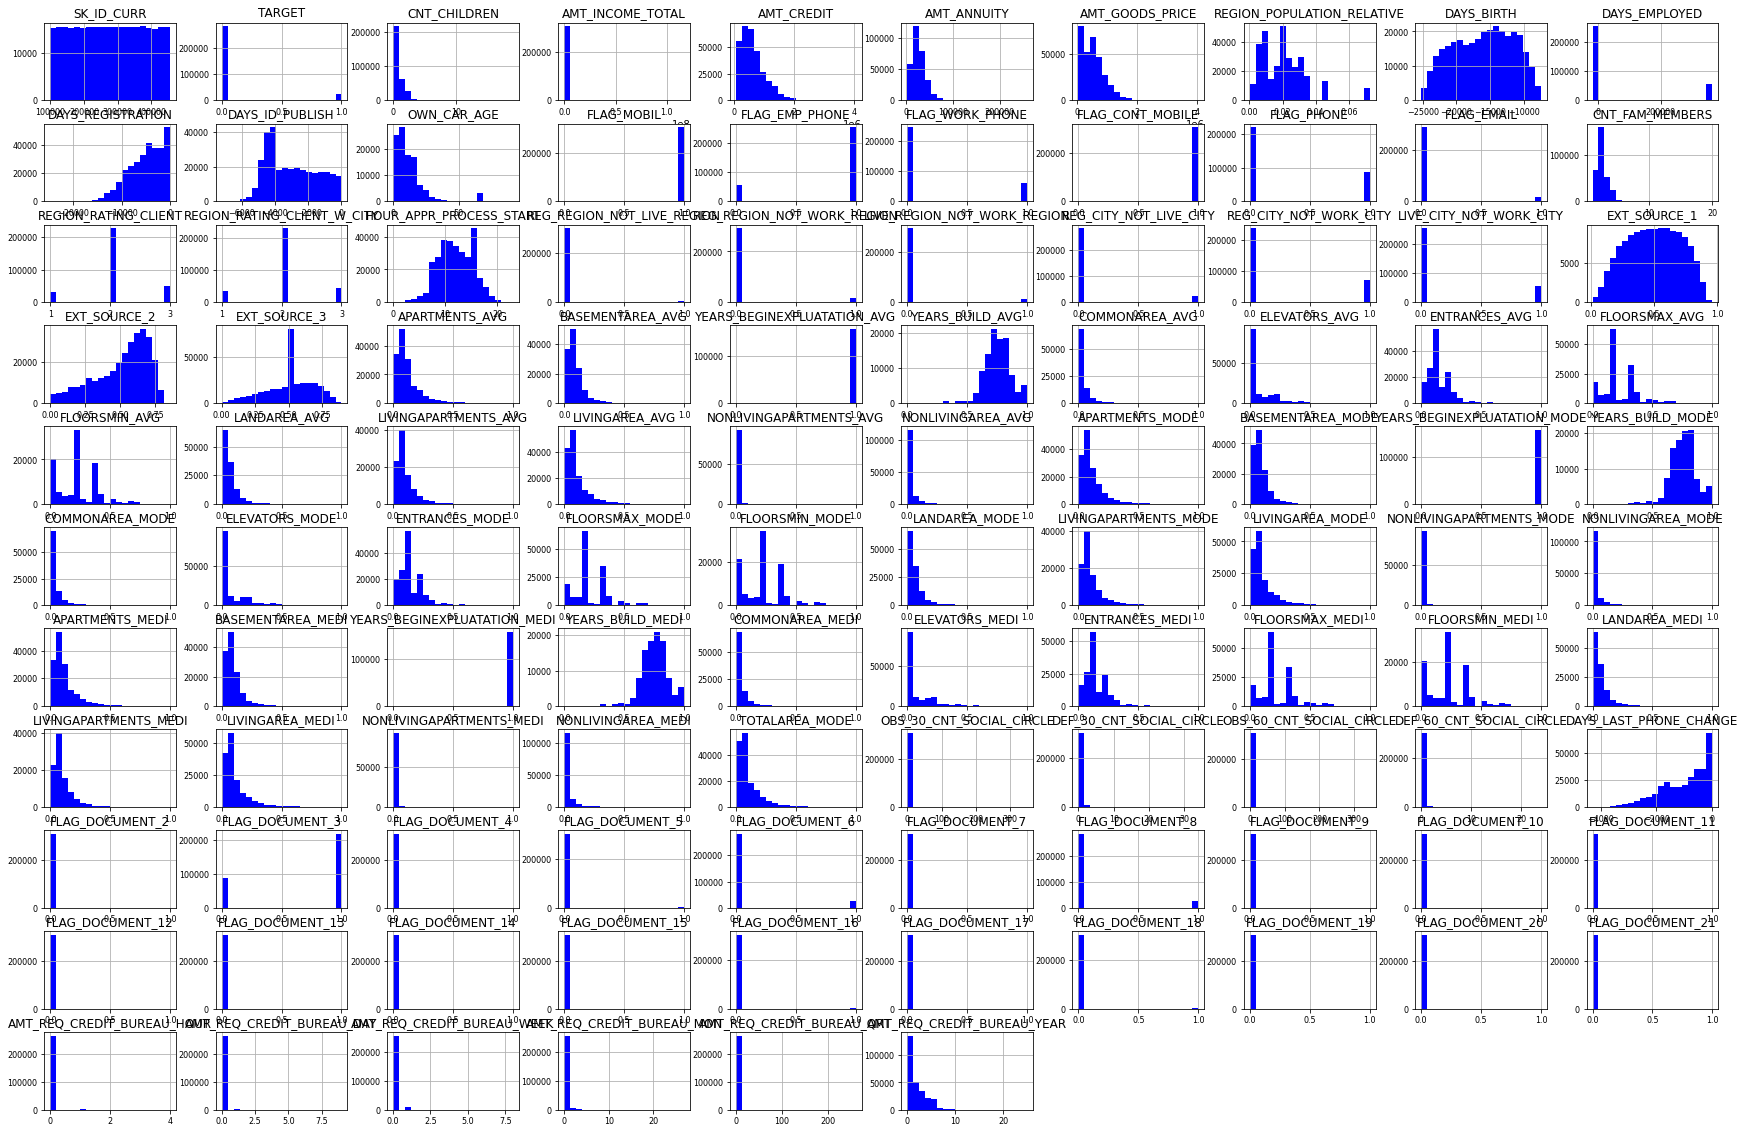

In [97]:
data_train.hist(figsize=(30, 20), color = 'b', bins=20, xlabelsize=8, ylabelsize=8)

In [98]:
correlations = data_train.corr()['TARGET'].sort_values()
print(correlations)

EXT_SOURCE_2                   -0.160303
EXT_SOURCE_3                   -0.157397
EXT_SOURCE_1                   -0.155317
DAYS_EMPLOYED                  -0.044932
FLOORSMAX_AVG                  -0.044003
FLOORSMAX_MEDI                 -0.043768
FLOORSMAX_MODE                 -0.043226
AMT_GOODS_PRICE                -0.039628
REGION_POPULATION_RELATIVE     -0.037227
ELEVATORS_AVG                  -0.034199
ELEVATORS_MEDI                 -0.033863
FLOORSMIN_AVG                  -0.033614
FLOORSMIN_MEDI                 -0.033394
LIVINGAREA_AVG                 -0.032997
LIVINGAREA_MEDI                -0.032739
FLOORSMIN_MODE                 -0.032698
TOTALAREA_MODE                 -0.032596
ELEVATORS_MODE                 -0.032131
LIVINGAREA_MODE                -0.030685
AMT_CREDIT                     -0.030369
APARTMENTS_AVG                 -0.029498
APARTMENTS_MEDI                -0.029184
FLAG_DOCUMENT_6                -0.028602
APARTMENTS_MODE                -0.027284
LIVINGAPARTMENTS

<AxesSubplot:>

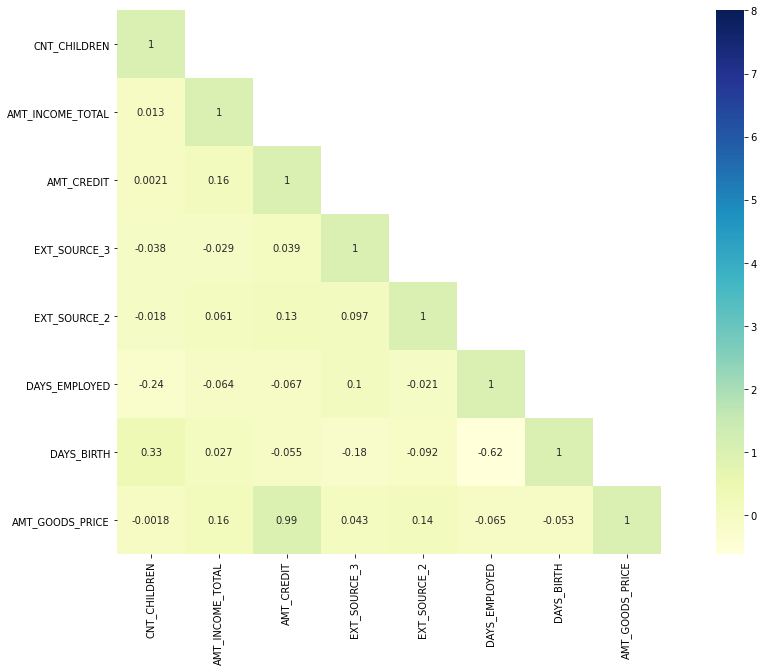

In [99]:
corrMatt = data_train[categorical_features + numerical_features].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, cmap="YlGnBu", mask=mask, vmax=8, square=True, annot=True)

----------------------------------------------------------------------------------------------------


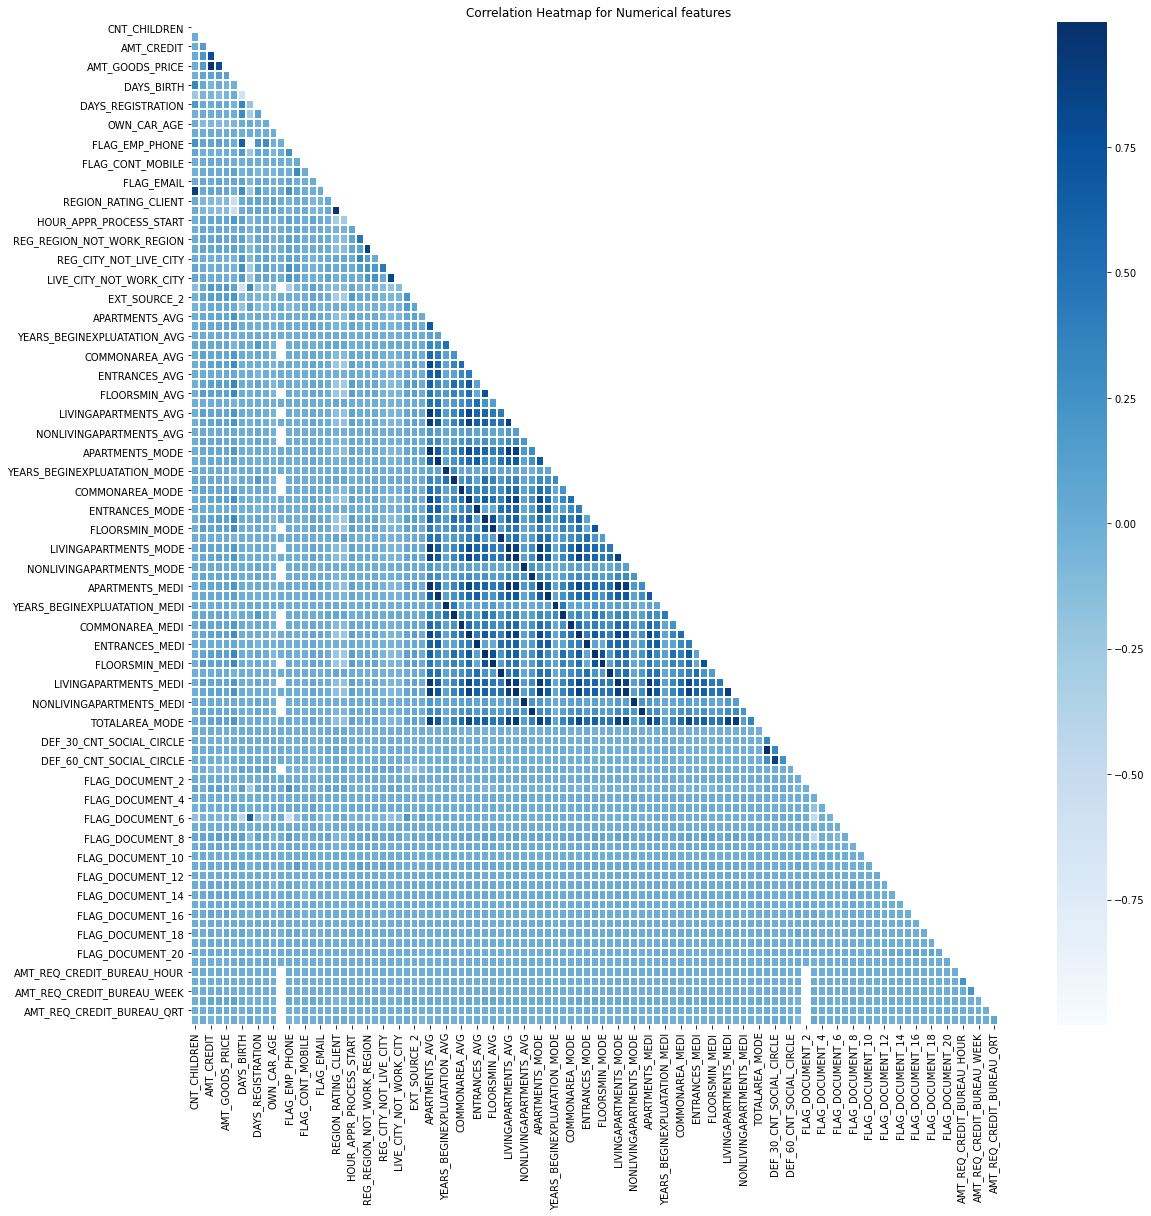

----------------------------------------------------------------------------------------------------


In [101]:
print('-' * 100)
#building the correlation dataframe
columns_to_drop = ['SK_ID_CURR'] + list(set(categorical_features) - set(['TARGET']))
corr_data = data_train.drop(columns_to_drop + ['TARGET'], axis = 1).corr()

#masking the heatmap to show only lower triangle. This is to save the RAM.
mask_array = np.ones(corr_data.shape)
mask_array = np.triu(mask_array)

    
plt.figure(figsize = (17,17), tight_layout = True)
sns.heatmap(corr_data, annot = False, mask = mask_array, linewidth = 0.1, cmap = "Blues")
plt.xticks(rotation = 90, fontsize = 10)
plt.yticks(fontsize = 10)
plt.title("Correlation Heatmap for Numerical features")
plt.show()
print("-"*100)

[1]	training's auc: 0.720447	training's binary_logloss: 0.67918	valid_1's auc: 0.697793	valid_1's binary_logloss: 0.674498
[2]	training's auc: 0.72702	training's binary_logloss: 0.667495	valid_1's auc: 0.70554	valid_1's binary_logloss: 0.658911
[3]	training's auc: 0.729485	training's binary_logloss: 0.657781	valid_1's auc: 0.708449	valid_1's binary_logloss: 0.645979
[4]	training's auc: 0.731748	training's binary_logloss: 0.649622	valid_1's auc: 0.708356	valid_1's binary_logloss: 0.634897
[5]	training's auc: 0.732934	training's binary_logloss: 0.642761	valid_1's auc: 0.710489	valid_1's binary_logloss: 0.625819
[6]	training's auc: 0.734467	training's binary_logloss: 0.636799	valid_1's auc: 0.712375	valid_1's binary_logloss: 0.618735
[7]	training's auc: 0.735735	training's binary_logloss: 0.631615	valid_1's auc: 0.715324	valid_1's binary_logloss: 0.61354
[8]	training's auc: 0.737157	training's binary_logloss: 0.627147	valid_1's auc: 0.717596	valid_1's binary_logloss: 0.608936
[9]	training

[69]	training's auc: 0.772541	training's binary_logloss: 0.571802	valid_1's auc: 0.734554	valid_1's binary_logloss: 0.528978
[70]	training's auc: 0.772769	training's binary_logloss: 0.57154	valid_1's auc: 0.734522	valid_1's binary_logloss: 0.529157
[71]	training's auc: 0.773009	training's binary_logloss: 0.571279	valid_1's auc: 0.734535	valid_1's binary_logloss: 0.528979
[72]	training's auc: 0.773295	training's binary_logloss: 0.571011	valid_1's auc: 0.734529	valid_1's binary_logloss: 0.527812
[73]	training's auc: 0.773649	training's binary_logloss: 0.57065	valid_1's auc: 0.734165	valid_1's binary_logloss: 0.526378
[74]	training's auc: 0.773855	training's binary_logloss: 0.570437	valid_1's auc: 0.734136	valid_1's binary_logloss: 0.526365
[75]	training's auc: 0.774074	training's binary_logloss: 0.570197	valid_1's auc: 0.734139	valid_1's binary_logloss: 0.526374
[76]	training's auc: 0.774342	training's binary_logloss: 0.569922	valid_1's auc: 0.734224	valid_1's binary_logloss: 0.526243
[7

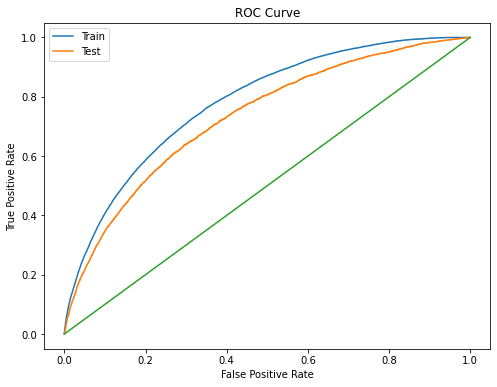

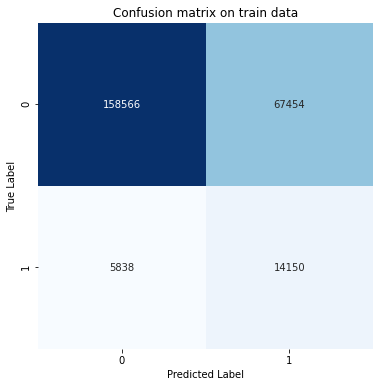

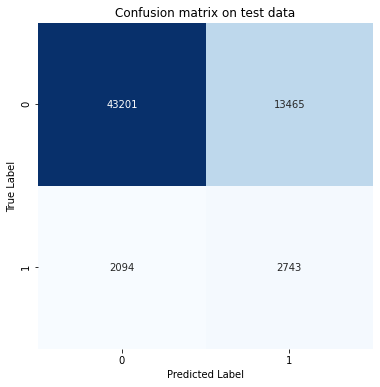

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix

# Loading dataset
df = pd.read_csv('application_train.csv')

# Features that we are going to use to train the model
used_features = [
    'TARGET',
    'NAME_CONTRACT_TYPE',
    'CODE_GENDER',
    'FLAG_OWN_CAR',
    'FLAG_OWN_REALTY',
    'CNT_CHILDREN',
    'AMT_INCOME_TOTAL',
    'AMT_CREDIT',
    'AMT_GOODS_PRICE',
    'NAME_INCOME_TYPE',
    'NAME_EDUCATION_TYPE',
    'DAYS_BIRTH',
    'DAYS_EMPLOYED',
    'CNT_FAM_MEMBERS',
    'EXT_SOURCE_1',
    'EXT_SOURCE_2',
    'EXT_SOURCE_3'
]

# Create a new data frame which only consists of those selected columns
reduced_df = df[used_features]

# A function to convert categorical data into one-hot representation (more than 2 categories)
columns = ['CODE_GENDER', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE']

def create_one_hot(reduced_df, columns):
    for column in columns:
        reduced_df = pd.concat([reduced_df, pd.get_dummies(df[column])], axis=1, join='inner')
        reduced_df = reduced_df.drop([column], axis=1)
    
    return reduced_df

reduced_df = create_one_hot(reduced_df, columns)

# Using label encoder to encode columns which consists of only 2 categories
le_name_contract_type = LabelEncoder()
reduced_df['NAME_CONTRACT_TYPE'] = le_name_contract_type.fit_transform(reduced_df['NAME_CONTRACT_TYPE'])

le_flag_own_car = LabelEncoder()
reduced_df['FLAG_OWN_CAR'] = le_flag_own_car.fit_transform(reduced_df['FLAG_OWN_CAR'])

le_flag_own_realty = LabelEncoder()
reduced_df['FLAG_OWN_REALTY'] = le_flag_own_realty.fit_transform(reduced_df['FLAG_OWN_REALTY'])

# Filling missing values with the mean of the corresponding column
reduced_df.loc[:,'AMT_GOODS_PRICE'] = reduced_df['AMT_GOODS_PRICE'].fillna(reduced_df['AMT_GOODS_PRICE'].mean())
reduced_df.loc[:,'CNT_FAM_MEMBERS'] = reduced_df['CNT_FAM_MEMBERS'].fillna(reduced_df['CNT_FAM_MEMBERS'].mean())
reduced_df.loc[:,'EXT_SOURCE_1'] = reduced_df['EXT_SOURCE_1'].fillna(reduced_df['EXT_SOURCE_1'].mean())
reduced_df.loc[:,'EXT_SOURCE_2'] = reduced_df['EXT_SOURCE_2'].fillna(reduced_df['EXT_SOURCE_2'].mean())
reduced_df.loc[:,'EXT_SOURCE_3'] = reduced_df['EXT_SOURCE_3'].fillna(reduced_df['EXT_SOURCE_3'].mean())

# Split the data into train/test
X = reduced_df.iloc[:,1:].values
y = reduced_df['TARGET'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

# Value normalization
min_max_scaler = MinMaxScaler()
X_train_scaled = min_max_scaler.fit_transform(X_train)
X_test_scaled = min_max_scaler.fit_transform(X_test)

# Initializing LightGBM classifier
model = lgb.LGBMClassifier(n_estimators=100, class_weight='balanced', random_state=22)

# Training the LightGBM model
model.fit(X_train_scaled, y_train, eval_metric='auc', 
          eval_set=[(X_train_scaled, y_train),(X_test_scaled, y_test)])


# Predict the probability score
prob_train = model.predict_proba(X_train_scaled)
prob_test = model.predict_proba(X_test_scaled)

# Create train and test curve
fpr_train, tpr_train, thresh_train = roc_curve(y_train, prob_train[:,1])
fpr_test, tpr_test, thresh_test = roc_curve(y_test, prob_test[:,1])

# Create the straight line (how the graph looks like if the model does random guess instead)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs)

# Plot the ROC graph
plt.figure(figsize=(8,6))
plt.title('ROC Curve')
plt.plot(fpr_train, tpr_train, label='Train')
plt.plot(fpr_test, tpr_test, label='Test')
plt.plot(p_fpr, p_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

# Calculating the train and test AUC score
auc_score_train = roc_auc_score(y_train, prob_train[:,1])
auc_score_test = roc_auc_score(y_test, prob_test[:,1])

print(auc_score_train)
print(auc_score_test)

#### THE CODE BELOW IS NOT EXPLAINED IN THE MEDIUM ARTICLE
# Predict train and test data
pred_train = model.predict(X_train_scaled)
pred_test = model.predict(X_test_scaled)

# Constructing the confusion matrix based on train data
cm_train = confusion_matrix(y_train, pred_train)

# Display the train confusion matrix
plt.figure(figsize=(6,6))
plt.title('Confusion matrix on train data')
sns.heatmap(cm_train, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Constructing the confusion matrix based on test data
cm_test = confusion_matrix(y_test, pred_test)

# Display the test confusion matrix
plt.figure(figsize=(6,6))
plt.title('Confusion matrix on test data')
sns.heatmap(cm_test, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

pd.DataFrame({
    'SK_ID_CURR': data_test['SK_ID_CURR'],
    'TARGET':     [ row[1] for row in probabilities]
}).to_csv('./sample_submission.csv',index=False)

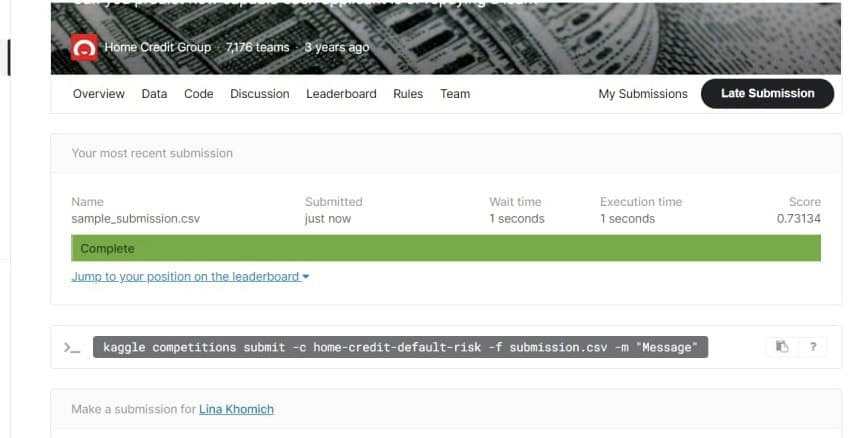

In [112]:
from IPython.display import Image
Image("screenshot.jpg")
